In [13]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
dataset1 = '../data/AirVisual Data Dump.csv'
datasetAirPort = '../data/airportdata.csv'

In [15]:
data = pd.read_csv(dataset1)
dataPort = pd.read_csv(datasetAirPort)

In [16]:
data["City"].fillna("Karachi", inplace = True)

In [17]:
data.Datetime = pd.to_datetime(data['Datetime'])
data['weekday'] = data['Datetime'].dt.dayofweek
data['weekdayName'] = data.Datetime.dt.day_name()
data['hour'] = data.Datetime.dt.hour
data['month'] = data.Datetime.dt.month
data['year'] = data.Datetime.dt.year
data['dayofmonth'] = data.Datetime.dt.day

In [18]:
dataP = dataPort.drop(['gust_mph', 'peak_wind_gust_mph'], axis = 1)

In [19]:
dataP['datetime'] = pd.to_datetime(dataP.valid)
dataP['datetime'] = dataP['datetime'].dt.round('H')

In [20]:
# OPFA Faisalabad
# OPKC Karachi
# OPLA Lahore
# OPPS Peshawar
# OPRN Islamabad
serialToCity = {'OPFA': 'Faisalabad', 'OPKC': 'Karachi', 'OPLA': 'Lahore', 'OPPS': 'Peshawar', 'OPRN': 'Islamabad'}

In [21]:
dataP['City'] = dataP.station.apply(lambda x : serialToCity[x])
dataA = dataP.drop(['valid','station', 'lon', 'lat'], axis = 1)
dataAmean = dataA.groupby(['City', 'datetime']).mean()

In [22]:
dfmerged = data.merge( dataAmean, how = 'left', left_on = ['Datetime', 'City'], right_on = ['datetime', 'City'])

In [82]:
df = dfmerged.drop(['longitude', 'latitude'], axis = 1)
df.corr('pearson')

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.981972,0.028740,-0.082070,0.062484,0.029526,0.016961,-0.003523,-0.027700,0.029919,0.077552,0.028662,-0.052282,0.015523,-0.039781,-0.049509,-0.147652
USAQI,0.981972,1.000000,0.033964,-0.111019,0.036400,0.072865,0.068662,-0.003716,-0.027461,0.015564,0.091346,0.025104,-0.079506,-0.008107,-0.071768,-0.078174,-0.202553
CO2,0.028740,0.033964,1.000000,-0.173334,-0.167704,0.063214,0.080631,-0.009809,0.042070,-0.005703,-0.140071,0.009270,-0.198874,0.008818,-0.127681,-0.145267,-0.126561
Temperature,-0.082070,-0.111019,-0.173334,1.000000,-0.065059,-0.315053,-0.347478,-0.000261,0.174570,0.196425,0.147730,0.008703,0.744362,-0.075547,0.254280,0.342160,0.277008
RelativeHumidity,0.062484,0.036400,-0.167704,-0.065059,1.000000,-0.282022,-0.362638,-0.009743,-0.142643,0.213105,0.130954,-0.015409,0.169734,0.612875,0.158143,0.136961,-0.082310
Outdoor PM2.5,0.029526,0.072865,0.063214,-0.315053,-0.282022,1.000000,0.937875,0.002019,-0.068443,-0.036980,-0.322479,-0.029605,-0.323867,-0.215789,-0.273062,-0.202675,-0.220832
OutdoorUSAQI,0.016961,0.068662,0.080631,-0.347478,-0.362638,0.937875,1.000000,-0.006308,-0.051618,-0.072605,-0.385460,-0.019142,-0.366617,-0.270268,-0.328373,-0.237670,-0.247635
weekday,-0.003523,-0.003716,-0.009809,-0.000261,-0.009743,0.002019,-0.006308,1.000000,-0.001271,0.004777,-0.003999,-0.007662,0.001442,-0.010398,0.007523,-0.008554,0.018850
hour,-0.027700,-0.027461,0.042070,0.174570,-0.142643,-0.068443,-0.051618,-0.001271,1.000000,-0.001491,0.001458,-0.001141,-0.072650,0.101517,0.039589,-0.018483,0.122579
month,0.029919,0.015564,-0.005703,0.196425,0.213105,-0.036980,-0.072605,0.004777,-0.001491,1.000000,-0.323392,-0.041651,0.152660,0.149167,-0.078198,0.014370,-0.112653


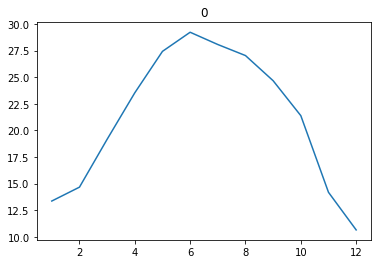

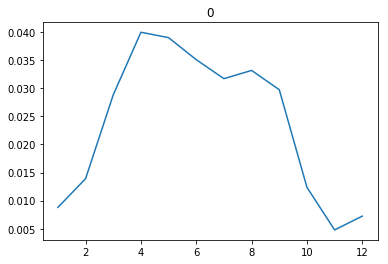

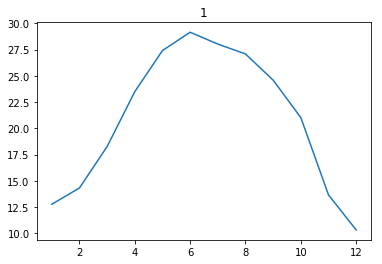

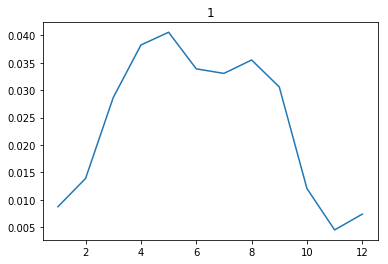

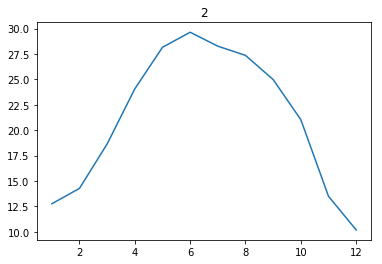

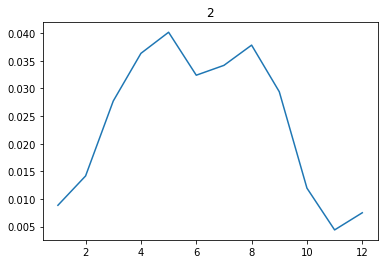

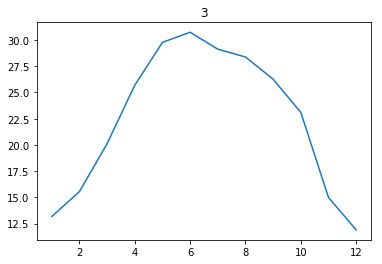

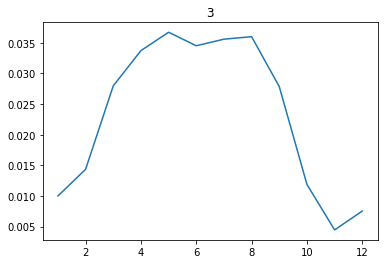

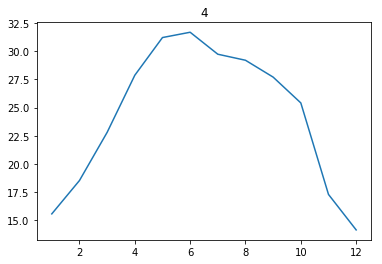

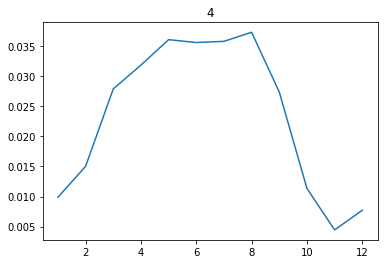

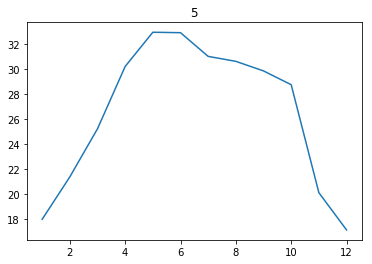

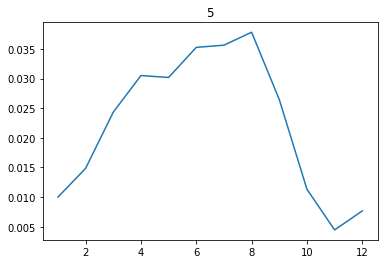

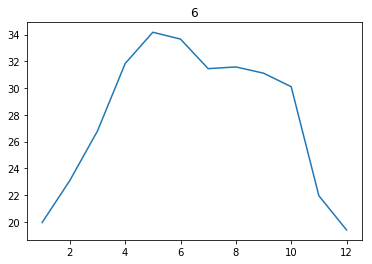

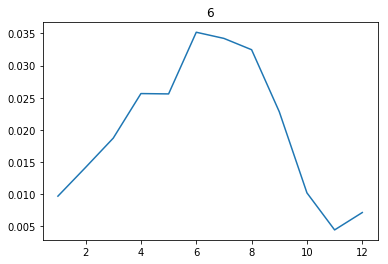

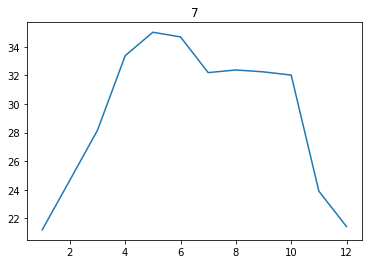

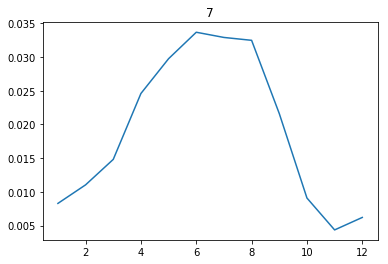

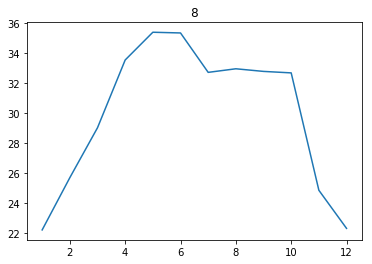

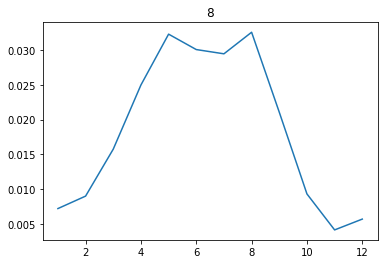

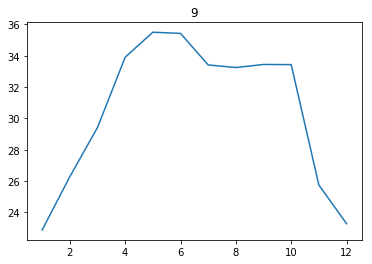

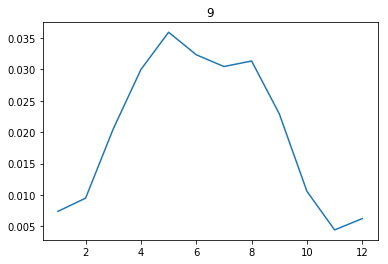

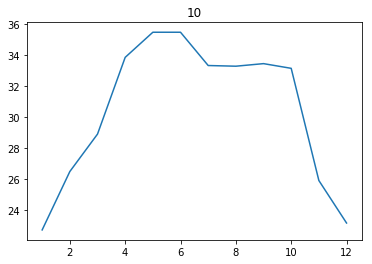

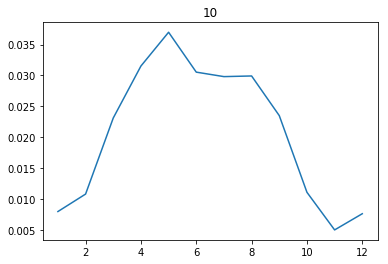

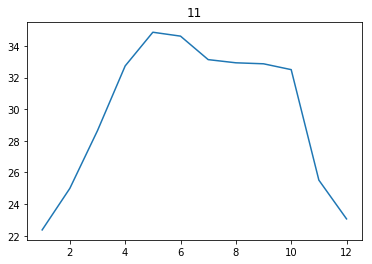

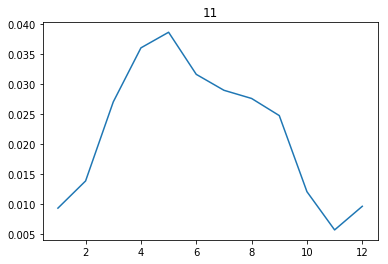

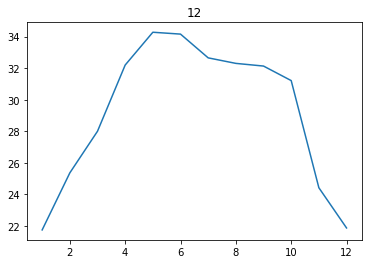

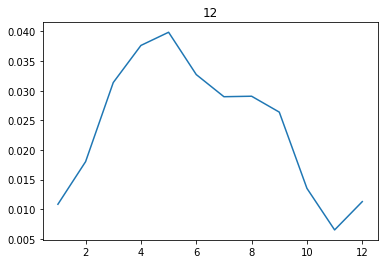

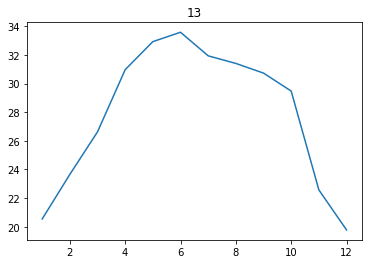

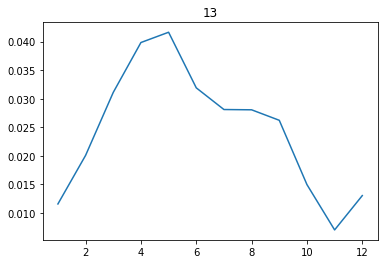

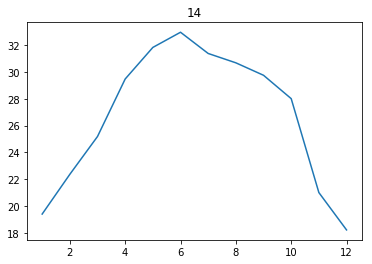

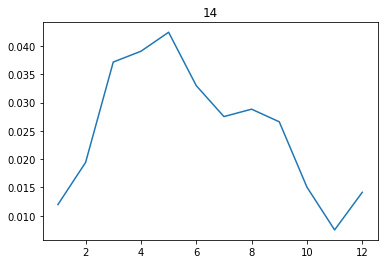

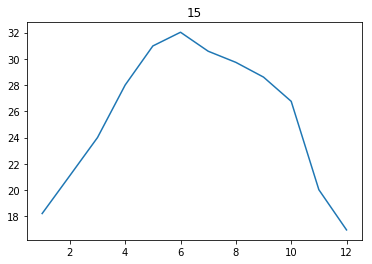

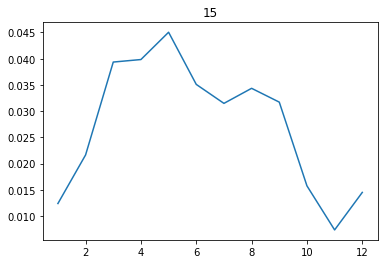

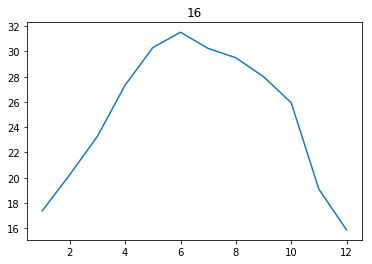

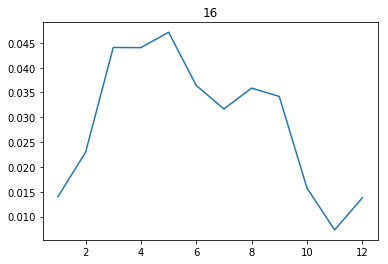

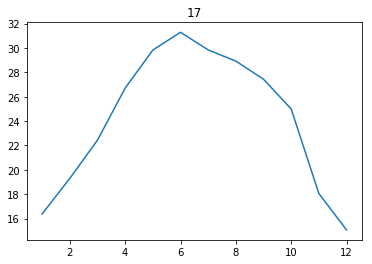

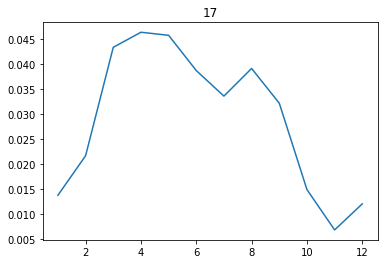

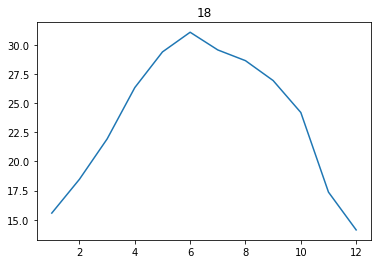

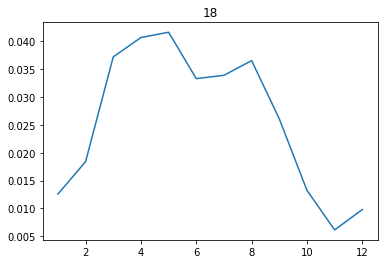

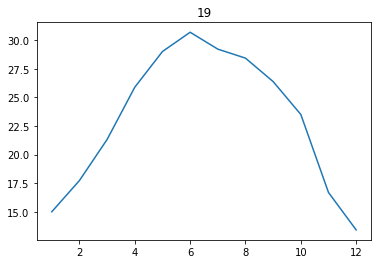

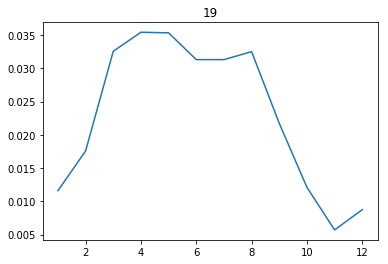

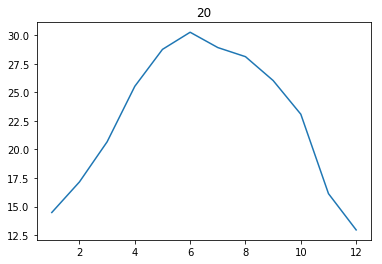

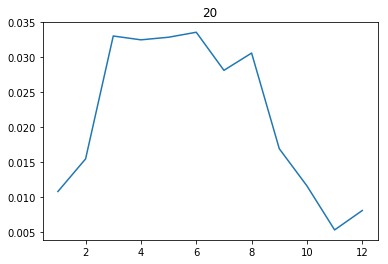

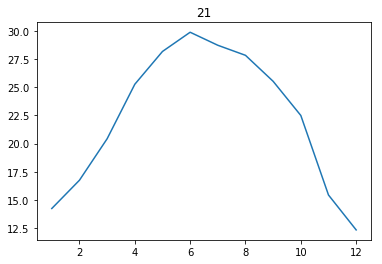

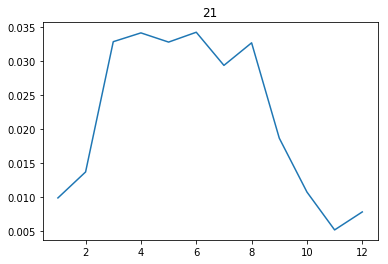

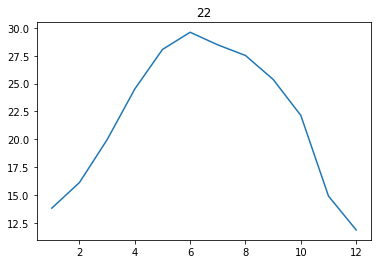

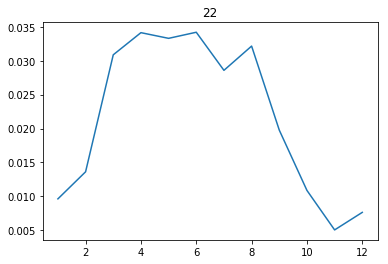

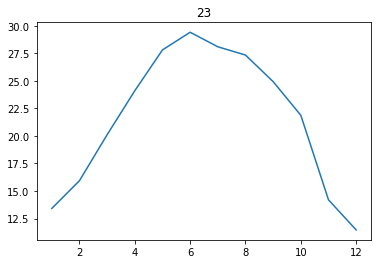

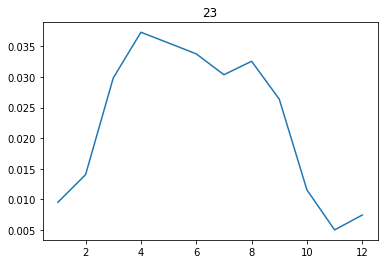

In [106]:
df17 = df[df.year == 2017]

for i in range(24):    
    df17m1 = df17[df17.hour == i]
    plt.plot(df17m1.groupby('month').mean().tmpc, label = i)
    plt.title(i)
    plt.show()
    plt.plot(1/df17m1.groupby('month').mean()['PM2.5'], label = 1)
    plt.title(i)
    plt.show()

In [116]:
df17m = df17[df17.month.isin(range(3,10))]
df17mw = df17m[df17m.weekday.isin(range(3,6))]
df17mw[df17mw.hour.isin(range(1,6))].corr('pearson')

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.940875,0.008878,-0.037837,-0.467742,0.401799,0.434681,0.032511,0.043831,-0.106186,NaN,-0.070147,-0.216300,-0.404100,-0.057388,-0.121487,-0.406929
USAQI,0.940875,1.000000,0.035150,0.011163,-0.462364,0.394120,0.448638,0.026343,0.041911,-0.065516,NaN,-0.049985,-0.194644,-0.387406,-0.090848,-0.142319,-0.460532
CO2,0.008878,0.035150,1.000000,-0.090594,-0.315270,-0.130206,-0.176606,0.003567,-0.002372,-0.115687,NaN,0.030327,-0.029249,-0.134434,-0.201728,-0.215602,-0.153714
Temperature,-0.037837,0.011163,-0.090594,1.000000,0.072342,-0.161355,-0.112040,0.025379,-0.091739,0.419363,NaN,0.114873,0.685254,0.030719,0.042107,0.157697,-0.027797
RelativeHumidity,-0.467742,-0.462364,-0.315270,0.072342,1.000000,-0.373548,-0.367452,-0.048997,0.048764,0.317533,NaN,0.105015,0.338889,0.658772,0.092309,0.222103,0.399415
Outdoor PM2.5,0.401799,0.394120,-0.130206,-0.161355,-0.373548,1.000000,0.936187,0.015481,0.016256,-0.132916,NaN,-0.166257,-0.312345,-0.307394,-0.159027,-0.195801,-0.205205
OutdoorUSAQI,0.434681,0.448638,-0.176606,-0.112040,-0.367452,0.936187,1.000000,0.015123,0.000937,-0.051014,NaN,-0.185648,-0.305021,-0.335311,-0.188210,-0.211649,-0.261760
weekday,0.032511,0.026343,0.003567,0.025379,-0.048997,0.015481,0.015123,1.000000,-0.002766,0.014685,NaN,-0.048493,0.029689,0.010789,0.012489,0.013977,0.014208
hour,0.043831,0.041911,-0.002372,-0.091739,0.048764,0.016256,0.000937,-0.002766,1.000000,0.003633,NaN,-0.005490,0.384898,-0.393361,-0.022283,0.129123,0.110555
month,-0.106186,-0.065516,-0.115687,0.419363,0.317533,-0.132916,-0.051014,0.014685,0.003633,1.000000,NaN,-0.012471,0.383088,0.337729,-0.119065,0.040974,0.004324


In [128]:
df18 = df[df.year == 2018]
df18m = df18[df18.month.isin(range(2,6))]
df18m[df18m.hour.isin(range(0,6))].corr()


,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.985123,0.073491,0.001980,0.009802,-0.007158,-0.013145,-0.004623,0.001830,0.034020,NaN,0.028272,0.048122,-0.060194,-0.023065,-0.012074,-0.059602
USAQI,0.985123,1.000000,0.104904,-0.016155,-0.008423,0.027600,0.037313,-0.001032,-0.001967,0.008470,NaN,0.018836,0.033473,-0.071150,-0.050526,-0.039801,-0.114901
CO2,0.073491,0.104904,1.000000,-0.324809,-0.278315,0.221720,0.279935,0.036766,-0.064886,-0.169950,NaN,-0.003670,-0.270669,-0.048284,-0.238996,-0.225225,-0.111318
Temperature,0.001980,-0.016155,-0.324809,1.000000,-0.040990,-0.167161,-0.226157,-0.016665,-0.110901,0.672187,NaN,0.210353,0.748151,-0.159536,0.258166,0.252779,0.207834
RelativeHumidity,0.009802,-0.008423,-0.278315,-0.040990,1.000000,-0.307504,-0.378277,0.005189,0.071533,-0.056917,NaN,-0.124701,0.137427,0.532653,0.242286,0.163377,-0.160778
Outdoor PM2.5,-0.007158,0.027600,0.221720,-0.167161,-0.307504,1.000000,0.933842,0.018710,0.007106,-0.260162,NaN,-0.028508,-0.295321,-0.098143,-0.324476,-0.219761,-0.239427
OutdoorUSAQI,-0.013145,0.037313,0.279935,-0.226157,-0.378277,0.933842,1.000000,0.007940,0.000175,-0.342432,NaN,-0.073284,-0.354452,-0.122858,-0.401632,-0.273961,-0.287412
weekday,-0.004623,-0.001032,0.036766,-0.016665,0.005189,0.018710,0.007940,1.000000,-0.000423,-0.023045,NaN,-0.031331,-0.018776,0.022869,0.028727,-0.033687,0.011432
hour,0.001830,-0.001967,-0.064886,-0.110901,0.071533,0.007106,0.000175,-0.000423,1.000000,-0.005819,NaN,-0.002007,0.391041,-0.476348,0.058952,0.214965,-0.054411
month,0.034020,0.008470,-0.169950,0.672187,-0.056917,-0.260162,-0.342432,-0.023045,-0.005819,1.000000,NaN,-0.005696,0.723781,-0.228047,0.289335,0.327006,0.360112
